<a href="https://colab.research.google.com/github/mili-who/first/blob/master/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview :

Mitron Bank, a financial institution, want to launch a new credit card line with the aim to broaden their reach in the financial market.

Atliq Data Services has approached to do the research and analysis on who might be the potential customers and their risk appetite. A data analyst over Atliq services has taken the responsibility to complete the project. The bank handed over a sample of 4000 customers to the company. The task is to present the findings and insights to the strategy team at Mitron Bank.

## Task:

Imagine yourself as Peter Pandey and perform the following task:
1. Use “Insight Ideas from Tony.pdf”. Create metrics and visuals accordingly.
2. Design a dashboard with your metrics and analysis. The end users of this
dashboard are top-level management and product strategy team - hence the
dashboard should be self-explanatory and easy to understand.
3. Present your insights to Mr.Bashnir Rover & team. Be creative and concise
with your presentation. Use your dashboard in the presentation along with the
deck.
4. Use additional data based on your own research to support your
recommendations.

**Column Description for df1(dim_customers):**
- customer_id: This column represents the Unique ID assigned to each customer.
- gender: This column represents the gender of the customer. (Male, Female)
- age_group: This column categorizes the customer into different age groups. (21-24, 25-34, 35-45, 45+)
- marital_status: This column indicates the marital status of the customer (single, married).
- city: This column represents the city of residence for the customer. (Mumbai, Delhi-NCR, Chennai, Hyderabad, Bengaluru)
- occupation: This column denotes the occupation or profession of the customer. (Salaried IT Employees, Salaried Other Employees, Business Owners, Freelancers, Government Employees)
- average_income: This column indicates the monthly average income of the customer, in INR currency.

**Column Description for df2(fact_spends):**
- customer_id: This column represents the Unique ID of each customer, linking to the dim_customer table.
- month: This column indicates the month in which the spending was recorded. (May, June, July, August, September, October)
- category: This column describes the category of spending (Entertainment, Apparel, Electronics, etc).
- payment_type: This column specifies the type of payment used by the customer (Debit Card, Credit Card, UPI, Net Banking).
- spends: This column shows the total amount spent by the customer in the specified month, category and payment_type.

###Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

###Loading and reading the datasets

In [3]:
df1 = pd.read_csv('dim_customers.csv')
df2 = pd.read_csv('fact_spends.csv')

print(df1)
print(df2)

     customer_id age_group       city                occupation  gender  \
0     ATQCUS1825       45+  Bengaluru     Salaried IT Employees    Male   
1     ATQCUS0809     25-34  Hyderabad  Salaried Other Employees    Male   
2     ATQCUS0663     25-34    Chennai  Salaried Other Employees    Male   
3     ATQCUS0452     25-34  Delhi NCR      Government Employees    Male   
4     ATQCUS3350     21-24  Bengaluru               Freelancers    Male   
...          ...       ...        ...                       ...     ...   
3995  ATQCUS3035       45+  Delhi NCR           Business Owners  Female   
3996  ATQCUS2585     35-45     Mumbai  Salaried Other Employees  Female   
3997  ATQCUS1229     35-45  Bengaluru     Salaried IT Employees    Male   
3998  ATQCUS0581     25-34  Bengaluru      Government Employees    Male   
3999  ATQCUS3477     25-34     Mumbai           Business Owners    Male   

     marital status  avg_income  
0           Married       73523  
1           Married       39922

In [ ]:
print('Dim_customers has: ', df1.shape[0], 'rows')
print('Dim_customers has: ', df1.shape[1], 'columns')

Dim_customers has:  4000 rows
Dim_customers has:  7 columns


In [ ]:
print('fact_spends has: ', df2.shape[0], 'rows')
print('fact_spends has: ', df2.shape[1], 'columns')

fact_spends has:  864000 rows
fact_spends has:  5 columns


In [ ]:
df1.head(10)

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376
5,ATQCUS3256,21-24,Delhi NCR,Salaried IT Employees,Male,Single,46586
6,ATQCUS3608,25-34,Chennai,Freelancers,Male,Single,34966
7,ATQCUS0611,25-34,Chennai,Salaried IT Employees,Male,Married,59078
8,ATQCUS3856,21-24,Bengaluru,Salaried Other Employees,Female,Single,30424
9,ATQCUS2640,35-45,Delhi NCR,Salaried IT Employees,Female,Married,67450


In [ ]:
df2.tail(10)

,customer_id,month,category,payment_type,spend
863990,ATQCUS1916,July,Food,Credit Card,319
863991,ATQCUS1183,September,Travel,Net Banking,303
863992,ATQCUS1602,October,Food,Credit Card,276
863993,ATQCUS2358,July,Bills,Credit Card,2054
863994,ATQCUS2184,July,Entertainment,Credit Card,526
863995,ATQCUS1993,June,Bills,Debit Card,897
863996,ATQCUS1063,September,Bills,Credit Card,2680
863997,ATQCUS0416,August,Others,Credit Card,270
863998,ATQCUS3361,September,Bills,UPI,446
863999,ATQCUS1736,September,Apparel,UPI,242


In [ ]:
#df2_sampled = df2.sample(n = 4000, random_state = 42)

In [ ]:
#df2_sampled.head(10)

In [ ]:
df1.isnull().sum()

customer_id       0
age_group         0
city              0
occupation        0
gender            0
marital status    0
avg_income        0
dtype: int64

In [ ]:
df2.isnull().sum()

customer_id     0
month           0
category        0
payment_type    0
spend           0
dtype: int64

In [ ]:
len(df2['customer_id'].unique())

#although df2 has 864000 observations for 'customer_id'. only 4000 of them are unique.

4000

In [4]:
merged_df = pd.merge(df1, df2, on= 'customer_id', how= 'right')

In [5]:
print('The merged dataframe has: ', merged_df.shape[0], 'rows')
print('The merged dataframe has: ', merged_df.shape[1], 'columns')

The merged dataframe has:  864000 rows
The merged dataframe has:  11 columns


In [6]:
merged_df.tail(10)

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
863990,ATQCUS1916,45+,Chennai,Salaried Other Employees,Male,Married,47085,July,Food,Credit Card,319
863991,ATQCUS1183,35-45,Delhi NCR,Freelancers,Male,Married,34513,September,Travel,Net Banking,303
863992,ATQCUS1602,35-45,Hyderabad,Freelancers,Male,Married,39561,October,Food,Credit Card,276
863993,ATQCUS2358,25-34,Chennai,Salaried IT Employees,Female,Married,63900,July,Bills,Credit Card,2054
863994,ATQCUS2184,25-34,Delhi NCR,Salaried IT Employees,Female,Married,60898,July,Entertainment,Credit Card,526
863995,ATQCUS1993,45+,Hyderabad,Freelancers,Male,Married,38310,June,Bills,Debit Card,897
863996,ATQCUS1063,35-45,Mumbai,Government Employees,Male,Married,52731,September,Bills,Credit Card,2680
863997,ATQCUS0416,25-34,Delhi NCR,Business Owners,Male,Married,71488,August,Others,Credit Card,270
863998,ATQCUS3361,21-24,Chennai,Salaried IT Employees,Male,Single,50593,September,Bills,UPI,446
863999,ATQCUS1736,45+,Mumbai,Freelancers,Male,Married,38457,September,Apparel,UPI,242


###Basic checks

In [ ]:
merged_df.isnull().sum()

customer_id       0
age_group         0
city              0
occupation        0
gender            0
marital status    0
avg_income        0
month             0
category          0
payment_type      0
spend             0
dtype: int64

The merged dataframe doesnot have any null values, except one in the column of 'spend'.

In [ ]:
for col in merged_df.columns:
  pct_missing = np.mean(merged_df[col].isnull())
  print('{} - {}%'.format(col, pct_missing))

customer_id - 0.0%
age_group - 0.0%
city - 0.0%
occupation - 0.0%
gender - 0.0%
marital status - 0.0%
avg_income - 0.0%
month - 0.0%
category - 0.0%
payment_type - 0.0%
spend - 0.0%


In [7]:
merged_df.describe(include = 'all')

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
count,864000,864000,864000,864000,864000,864000,864000.000000,864000,864000,864000,864000.000000
unique,4000,4,5,5,2,2,NaN,6,9,4,NaN
top,ATQCUS1371,25-34,Mumbai,Salaried IT Employees,Male,Married,NaN,July,Health & Wellness,Credit Card,NaN
freq,216,323568,232848,279504,560952,677376,NaN,144000,96000,216000,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,51657.032250,NaN,NaN,NaN,614.464994
std,NaN,NaN,NaN,NaN,NaN,NaN,14688.312762,NaN,NaN,NaN,661.571676
min,NaN,NaN,NaN,NaN,NaN,NaN,24816.000000,NaN,NaN,NaN,6.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,38701.000000,NaN,NaN,NaN,191.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,50422.000000,NaN,NaN,NaN,395.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,64773.250000,NaN,NaN,NaN,793.000000


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864000 entries, 0 to 863999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   customer_id     864000 non-null  object
 1   age_group       864000 non-null  object
 2   city            864000 non-null  object
 3   occupation      864000 non-null  object
 4   gender          864000 non-null  object
 5   marital status  864000 non-null  object
 6   avg_income      864000 non-null  int64 
 7   month           864000 non-null  object
 8   category        864000 non-null  object
 9   payment_type    864000 non-null  object
 10  spend           864000 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 79.1+ MB


In [ ]:
for col in merged_df.describe(include= 'O').columns:
  print(col)
  print(merged_df[col].unique())
  print('-' * 50)

customer_id
['ATQCUS1371' 'ATQCUS0368' 'ATQCUS0595' ... 'ATQCUS2357' 'ATQCUS1814'
 'ATQCUS0890']
--------------------------------------------------
age_group
['35-45' '25-34' '45+' '21-24']
--------------------------------------------------
city
['Chennai' 'Delhi NCR' 'Bengaluru' 'Mumbai' 'Hyderabad']
--------------------------------------------------
occupation
['Salaried IT Employees' 'Salaried Other Employees' 'Government Employees'
 'Business Owners' 'Freelancers']
--------------------------------------------------
gender
['Male' 'Female']
--------------------------------------------------
marital status
['Married' 'Single']
--------------------------------------------------
month
['July' 'October' 'May' 'September' 'June' 'August']
--------------------------------------------------
category
['Health & Wellness' 'Groceries' 'Electronics' 'Bills' 'Entertainment'
 'Apparel' 'Food' 'Others' 'Travel']
--------------------------------------------------
payment_type
['Credit Card' 'UPI' 

In [ ]:
merged_df.columns

Index(['customer_id', 'age_group', 'city', 'occupation', 'gender',
       'marital status', 'avg_income', 'month', 'category', 'payment_type',
       'spend'],
      dtype='object')

In [ ]:
merged_df.value_counts()

customer_id  age_group  city       occupation                gender  marital status  avg_income  month      category  payment_type  spend
ATQCUS0001   21-24      Mumbai     Salaried IT Employees     Male    Married         49767       August     Apparel   Credit Card   1641     1
ATQCUS2667   35-45      Delhi NCR  Salaried Other Employees  Female  Married         40831       October    Food      Debit Card    410      1
                                                                                                 May        Others    Debit Card    155      1
                                                                                                                      Net Banking   56       1
                                                                                                                      UPI           148      1
                                                                                                                                            ..
ATQC

In [ ]:
merged_df.corr()

,avg_income,spend
avg_income,1.000000,0.248159
spend,0.248159,1.000000


<Axes: xlabel='avg_income', ylabel='spend'>

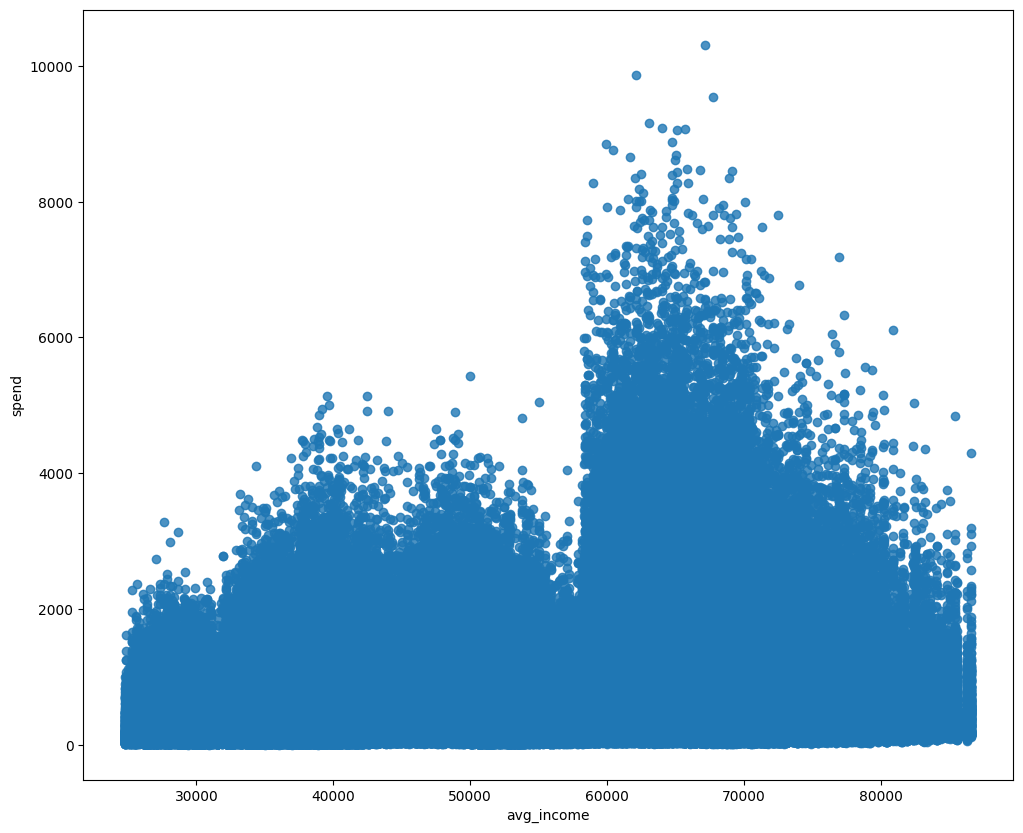

In [ ]:
plt.figure(figsize= (12,10))
sns.regplot(x = 'avg_income', y = 'spend', data= merged_df)
#plt.rcParams['figure.figsize'] = (10,10)

###We will explore some basic questions which will help us draw a clear picture about the customers and their transaction pattern.

###Q Which age group prefers transactions by credit card the most?

In [ ]:
age_group_sorted =merged_df.sort_values('age_group', ascending = True)

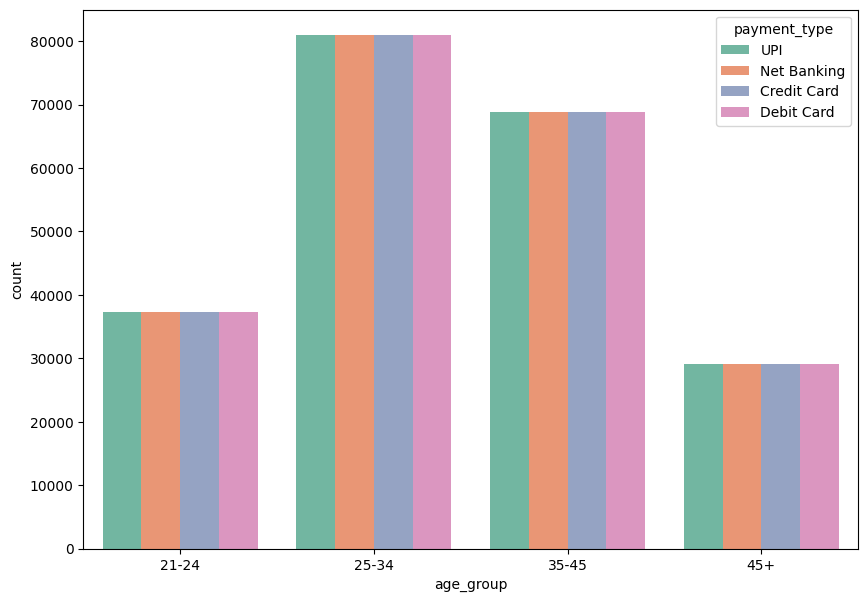

In [ ]:
plt.figure(figsize= (10,7))
sns.countplot(x= 'age_group',hue= 'payment_type', data = age_group_sorted, palette = 'Set2')
plt.show()

In [ ]:
age_25_34 = merged_df[merged_df['age_group'] == '25-34']
payment_type_name = age_25_34['payment_type'].mode().values[0]
payment_type_name

'Credit Card'

###From the above countplot, we can say that customers who are in the age group 24-34 years uses credit cards widely.

In [ ]:
credit_25_34 = merged_df[(merged_df['age_group'] == '25-34') & (merged_df['payment_type'] == 'Credit Card')]

credit_25_34_monthly = credit_25_34.groupby('month')['spend'].sum()

total_spend_monthly = merged_df.groupby('month')['spend'].sum()

credit_percentage_monthly = (credit_25_34_monthly / total_spend_monthly) * 100

print('Percentage usage of credit card by the age group of 25 to 34 years: ')
print(credit_percentage_monthly)

Percentage usage of credit card by the age group of 25 to 34 years: 
month
August       17.873916
July         17.815441
June         17.851999
May          17.912328
October      17.817992
September    17.866589
Name: spend, dtype: float64


##Q Which profession has the highest transaction amount by credit card?

In [ ]:
spend_data = merged_df[['age_group', 'city', 'occupation','gender', 'month','avg_income', 'category' ,'payment_type','spend']]

In [ ]:
sum_spend_by_occupation = spend_data.groupby(['occupation', 'payment_type'])['spend'].sum().reset_index()
print(sum_spend_by_occupation.sort_values(['spend'], ascending = False))

                  occupation payment_type      spend
12     Salaried IT Employees  Credit Card  101405325
15     Salaried IT Employees          UPI   63531807
13     Salaried IT Employees   Debit Card   54324742
16  Salaried Other Employees  Credit Card   37132145
0            Business Owners  Credit Card   36014430
4                Freelancers  Credit Card   26020606
14     Salaried IT Employees  Net Banking   24458430
7                Freelancers          UPI   24439623
19  Salaried Other Employees          UPI   22633909
3            Business Owners          UPI   22318488
1            Business Owners   Debit Card   19616090
17  Salaried Other Employees   Debit Card   19250299
5                Freelancers   Debit Card   17373485
8       Government Employees  Credit Card   15736367
2            Business Owners  Net Banking   10055701
9       Government Employees   Debit Card    8992613
18  Salaried Other Employees  Net Banking    8495333
11      Government Employees          UPI    7

###Salaried IT employees used credit card to transact an enormous amount of INR 10,14,05,325.

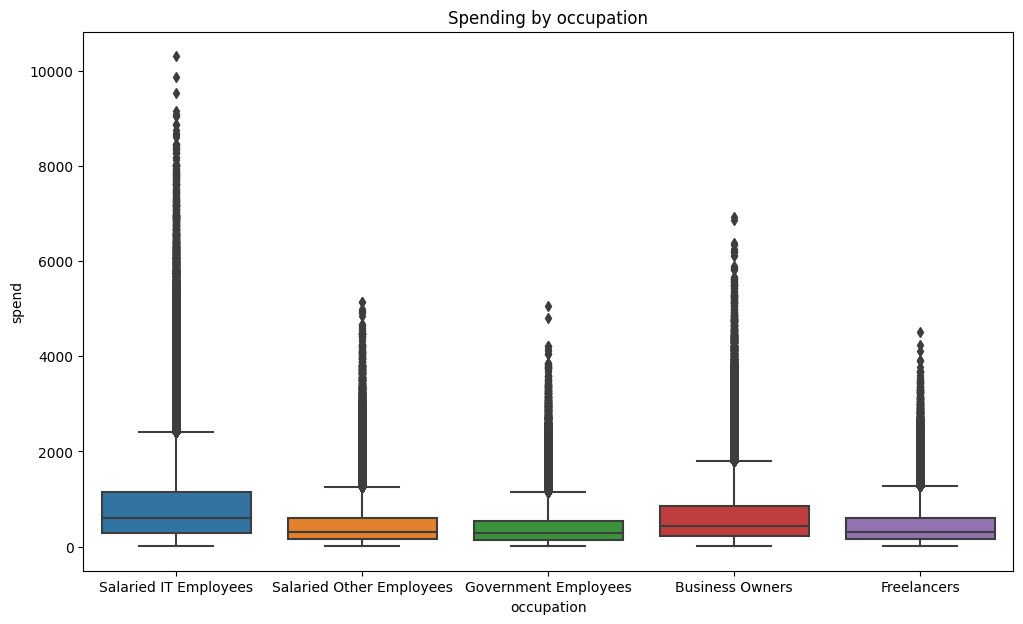

In [ ]:
plt.figure(figsize= (12,7))
sns.boxplot(x='occupation', y='spend', data=spend_data)
plt.title('Spending by occupation')
plt.show()

###The salaried IT Employees spend the most, followed by business owners, salaried other employees and rest.

##Q Which city has the highest average spending by credit card?

In [ ]:
user_data_df = merged_df[['customer_id', 'city', 'month', 'gender','category', 'avg_income','payment_type', 'spend']]

In [ ]:
avg_transactions = user_data_df.groupby(['city','payment_type'])['spend'].mean()
avg_transactions.columns = ['city', 'payment_type', 'avg_amount']
avg_transactions

city       payment_type
Bengaluru  Credit Card      991.553608
           Debit Card       557.233516
           Net Banking      263.278764
           UPI              654.226685
Chennai    Credit Card      735.595679
           Debit Card       399.700107
           Net Banking      173.879230
           UPI              464.328604
Delhi NCR  Credit Card     1141.135952
           Debit Card       619.487331
           Net Banking      279.645012
           UPI              733.764934
Hyderabad  Credit Card      860.539410
           Debit Card       479.307133
           Net Banking      211.820811
           UPI              556.888483
Mumbai     Credit Card     1195.056861
           Debit Card       665.178846
           Net Banking      303.763039
           UPI              791.379578
Name: spend, dtype: float64

###The salaried IT employees in Mumbai has the highest average transaction rate through credit cards, followed by Delhi NCR , Bengaluru, Hyderabad and Chennai.

##Q What is income utilization % of customers across profession?

In [21]:
summation_df = merged_df.groupby(['customer_id', 'occupation', 'avg_income']).agg({'spend' : 'sum'}).reset_index()
summation_df['income_utilization'] = summation_df['spend'] / summation_df['avg_income'] * 100
summation_df.head(10)

,customer_id,occupation,avg_income,spend,income_utilization
0,ATQCUS0001,Salaried IT Employees,49767,170545,342.686921
1,ATQCUS0002,Salaried IT Employees,47336,168514,355.995437
2,ATQCUS0003,Salaried IT Employees,48851,157534,322.478557
3,ATQCUS0004,Salaried IT Employees,45425,162655,358.073748
4,ATQCUS0005,Salaried IT Employees,46732,157296,336.591629
5,ATQCUS0006,Salaried IT Employees,50620,185132,365.728961
6,ATQCUS0007,Salaried IT Employees,48756,158844,325.793748
7,ATQCUS0008,Salaried IT Employees,46854,156973,335.025825
8,ATQCUS0009,Salaried IT Employees,47879,177748,371.244178
9,ATQCUS0010,Salaried IT Employees,49465,179746,363.380168


In [27]:
summation_df['income_utilization'].mean()

257.68810853142514

In [28]:
summation_df.groupby(['occupation'])['income_utilization'].mean().reset_index()

,occupation,income_utilization
0,Business Owners,199.440433
1,Freelancers,274.483204
2,Government Employees,173.776120
3,Salaried IT Employees,305.558859
4,Salaried Other Employees,252.161584


###Salaried IT employees has the highest income utilization percentage, i.e., 305.55%. Followed by Freelancers at 274.48%, Salaried Other Employees at 252.16%, Business Owners at 199.44% and Government Employees at 173.77%.

##Q What is the total sum of money spend through different payment types?

In [ ]:
spend_by_payment_type = spend_data.groupby('payment_type')['spend'].sum().reset_index()
spend_by_payment_type.sort_values('spend', ascending = False)

,payment_type,spend
0,Credit Card,216308873
3,UPI,140823223
1,Debit Card,119557229
2,Net Banking,54208430


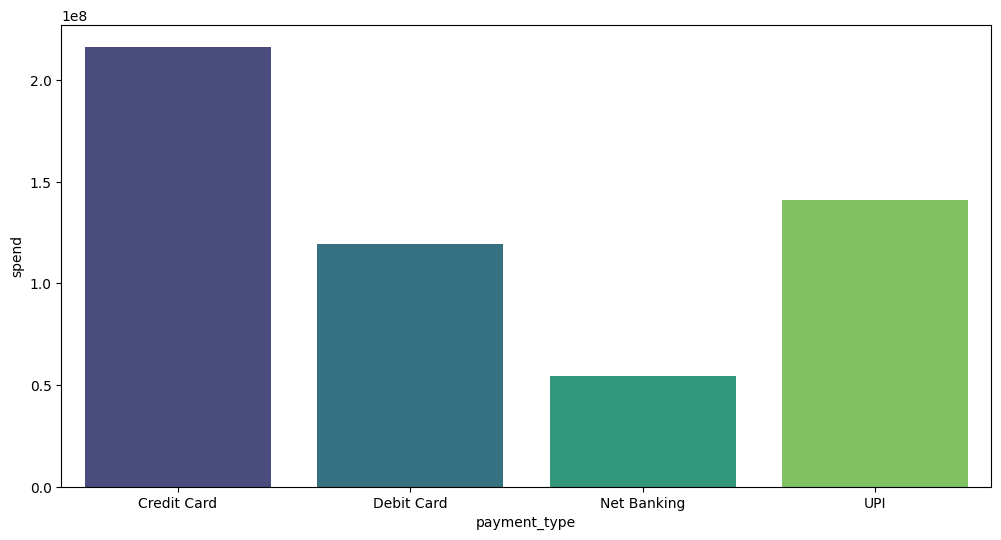

In [ ]:
plt.figure(figsize= (12, 6))
sns.barplot(x='payment_type', y='spend', data=spend_by_payment_type,  palette='viridis')
plt.show()

###Total transaction amount by Credit card across profession amounts to INR 21,63,08,873. Rest of the payment are done by UPI, followed by Debit card and Net Banking.

##Q Give the maximum money spend on category month wise.

In [ ]:
category_df = spend_data.groupby(['category', 'month']).agg({'spend' : 'sum'}).reset_index()
category_df =category_df.sort_values(['month','spend'], ascending = False)

In [ ]:
category_df.head(55)

,category,month,spend
11,Bills,September,22903711
35,Groceries,September,18812108
17,Electronics,September,17353373
41,Health & Wellness,September,14389670
53,Travel,September,12963948
29,Food,September,9576163
23,Entertainment,September,9005981
5,Apparel,September,7435269
47,Others,September,3489354
10,Bills,October,17036774


###Every month, starting from May till October, the maximum :money spend is on the category 'bills'.

##Q What is the maximum transaction amount made towards different categories at a time?

In [ ]:
cat_df = spend_data.groupby(['category'])['spend'].max()
category_dict = {'category' : [],
                 'max_spend' : []}

for index in cat_df.index:
  category_dict['category'].append(index)
  category_dict['max_spend'].append(cat_df[index])

category_df = pd.DataFrame(category_dict)

In [ ]:
category_df

,category,max_spend
0,Apparel,5430
1,Bills,10313
2,Electronics,7950
3,Entertainment,4905
4,Food,3071
5,Groceries,7396
6,Health & Wellness,9055
7,Others,1790
8,Travel,6368


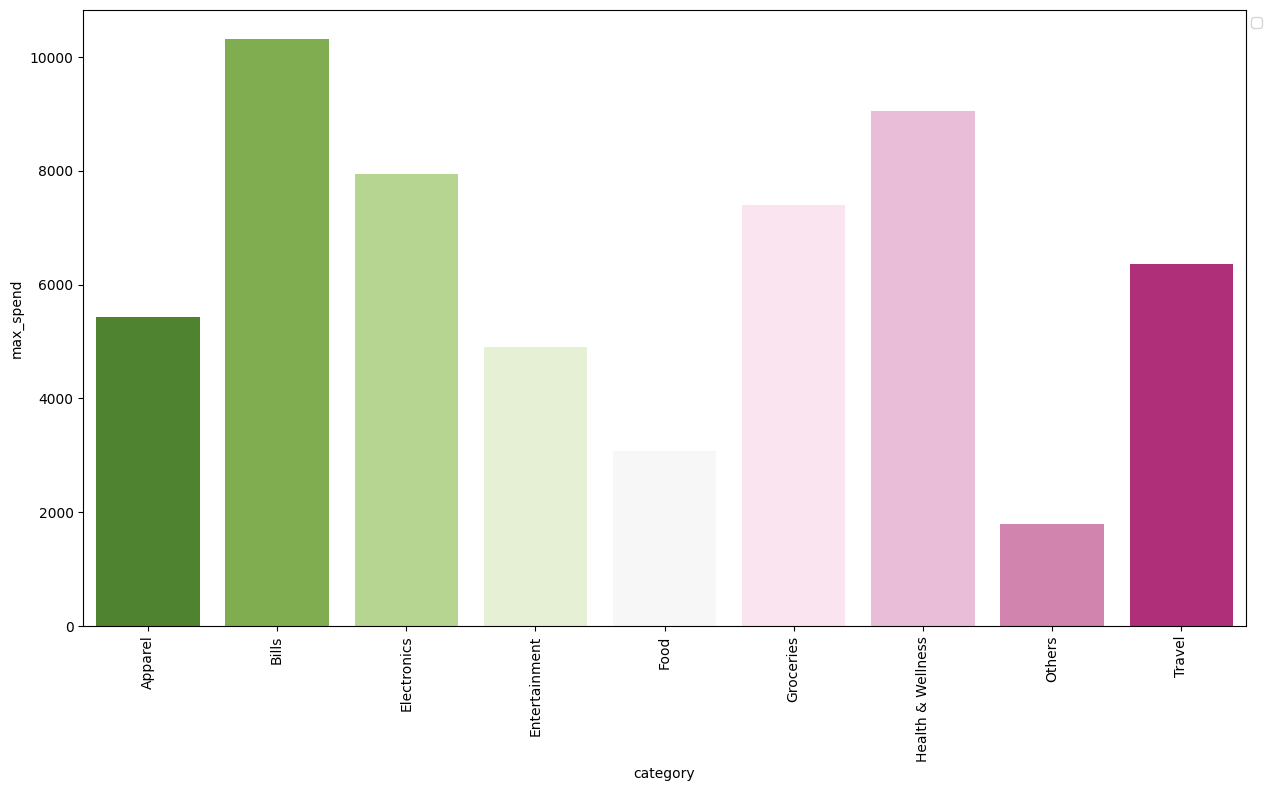

In [ ]:
sns.barplot(x= 'category', y= 'max_spend', data= category_df, palette= 'PiYG_r', dodge= False)

plt.rcParams['figure.figsize'] = (15,8)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor = (1.02, 1), loc= 'upper right')

###Highest one time spend by customer is INR 10313, made to the category 'bills'. Followed by 'Heath & Wellness', 'Electronics', 'Groceries', 'Travel', Apparel', 'Entertainment', 'Food' and 'Others'.

##Q Where do the people spend the most money on?

In [ ]:
cat = spend_data.groupby(['category', 'gender']).agg({'spend'  : 'sum'}).reset_index()
cat = cat.sort_values('spend', ascending= False)
cat.head(17)

,category,gender,spend
3,Bills,Male,80567679
11,Groceries,Male,66187511
5,Electronics,Male,60857815
17,Travel,Male,36576633
12,Health & Wellness,Female,36202396
7,Entertainment,Male,31475189
13,Health & Wellness,Male,29397471
9,Food,Male,27159868
2,Bills,Female,24345089
16,Travel,Female,22646691


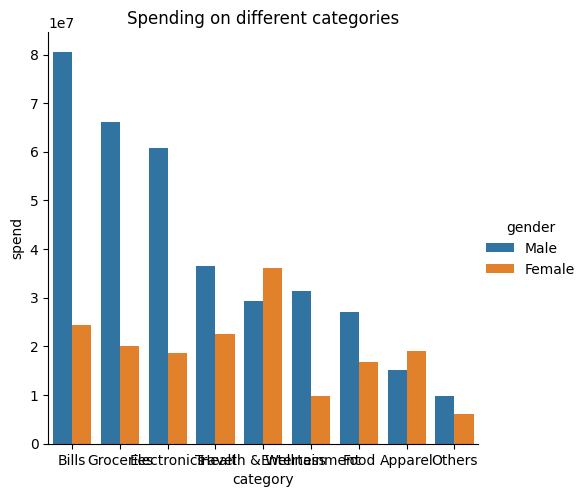

In [ ]:
#plt.figure(figsize= (15, 8))
plt.rcParams['figure.figsize'] = (15,7)
sns.catplot(data= cat, x= 'category', y= 'spend', kind= 'bar', hue= 'gender')
plt.title('Spending on different categories')
plt.show()

###People spend most money on necessaties which includes Bills, Groceries, Electronics and so on. Electronics have certainly climbed the ladder during the lockdown since many of us were locked inside our home, everything from education to groceries are available through internet.

##Q What is the median salary income for both the genders?

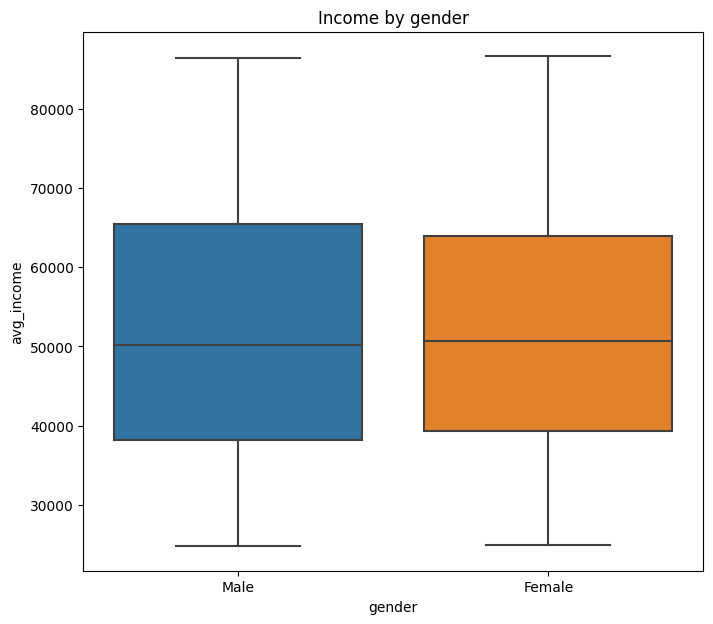

In [ ]:
plt.figure(figsize= (8,7))
sns.boxplot(x= 'gender', y= 'avg_income', data = spend_data)
plt.title('Income by gender')
plt.show()

###The median salary of both genders are almost equal(~ 50,000).

##Q Whose average transaction amount is more? Male or Female?

In [ ]:
gender_df = merged_df[['gender', 'payment_type', 'spend']]

In [ ]:
avg_transactions_bygender = gender_df.groupby(['gender', 'payment_type'])['spend'].mean().reset_index()
avg_transactions_bygender

,gender,payment_type,spend
0,Female,Credit Card,951.761134
1,Female,Debit Card,516.145429
2,Female,Net Banking,231.348209
3,Female,UPI,594.239566
4,Male,Credit Card,1028.262996
5,Male,Debit Card,573.689150
6,Male,Net Banking,261.562679
7,Male,UPI,683.141837


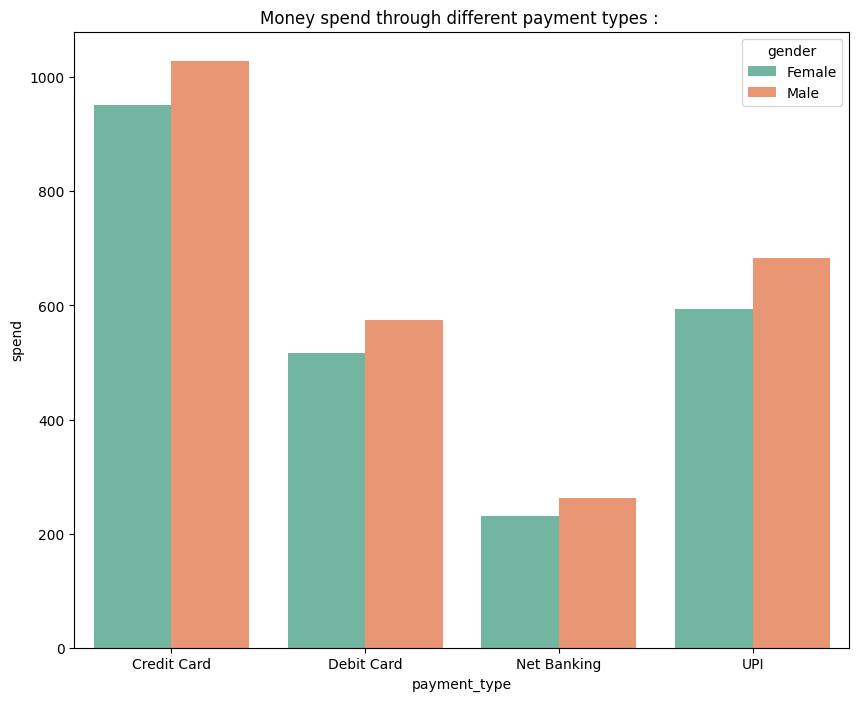

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(data= avg_transactions_bygender, x= 'payment_type', y= 'spend', hue= 'gender', palette= 'Set2')
plt.title('Money spend through different payment types : ')
plt.show()

###Males spends more and uses all payment methods more often than females. However, the difference is not huge.

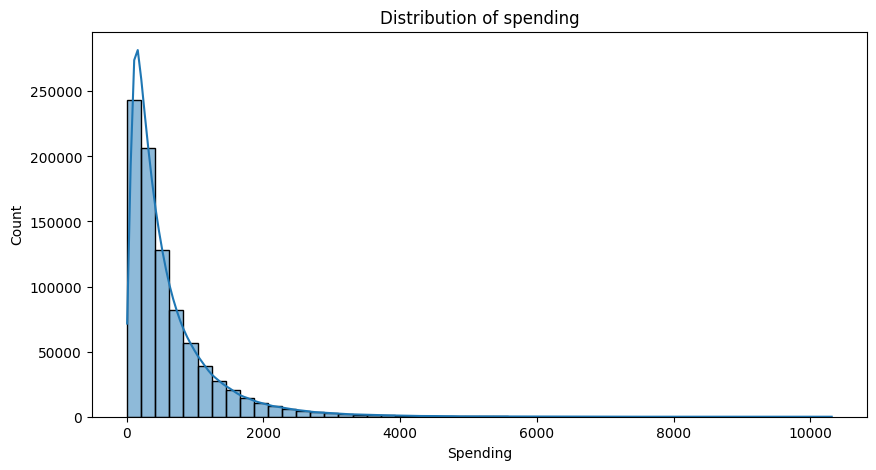

In [ ]:
plt.figure(figsize= (10, 5))
sns.histplot(data= spend_data, x= 'spend', bins= 50, kde= True)
plt.xlabel('Spending')
plt.title('Distribution of spending')
plt.show()

In [ ]:
spend_data['spend'].min()

6

###The above histogram illustrates the spending pattern among customers. The distribution is skewed towards left, indicating more datapoints are present between [0 - 2000] bracket. Hence, most of the customers spend between INR 6 to 2000, on average.

##Q Find the number of transactions done by customers in a month.

In [ ]:
max_transactions = merged_df.groupby(['customer_id'])['spend'].count().max()
max_transactions

216

In [ ]:
transaction_df = merged_df.groupby(['customer_id', 'gender','payment_type'])['spend'].count().reset_index()
transaction_df.columns= ['customer_id','gender','payment_type', 'transaction_count']
transaction_df

,customer_id,gender,payment_type,transaction_count
0,ATQCUS0001,Male,Credit Card,54
1,ATQCUS0001,Male,Debit Card,54
2,ATQCUS0001,Male,Net Banking,54
3,ATQCUS0001,Male,UPI,54
4,ATQCUS0002,Male,Credit Card,54
...,...,...,...,...
15995,ATQCUS3999,Female,UPI,54
15996,ATQCUS4000,Female,Credit Card,54
15997,ATQCUS4000,Female,Debit Card,54
15998,ATQCUS4000,Female,Net Banking,54


###All the customers have used all the payment types(credit card, debit card, net banking and UPI) 54 times each.

##Q Check the marital status of the customers and how much money they spend on various categories.

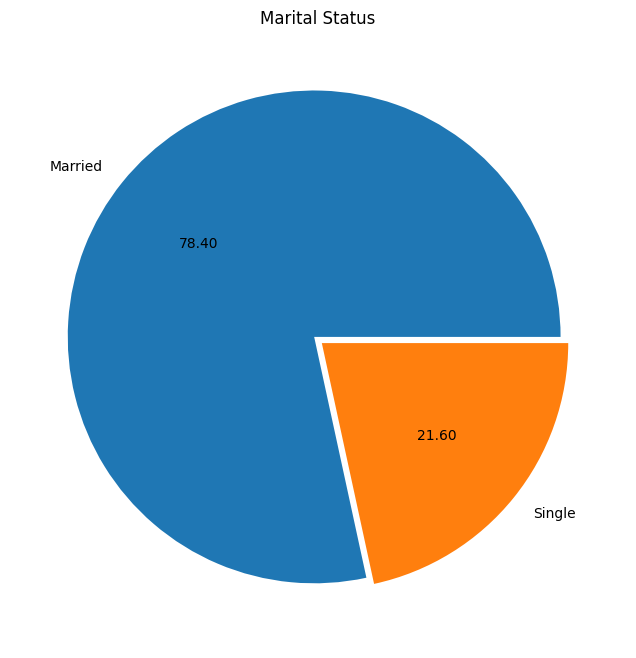

In [ ]:
x = df1['marital status'].value_counts(normalize= True)
plt.figure(figsize = (8,8))
plt.pie(x, labels= ['Married', 'Single'], explode= [0.02, 0.02], autopct= '%.2f')
plt.title('Marital Status')
plt.show()

In [ ]:
x = df1['marital status'].value_counts()
x

Married    3136
Single      864
Name: marital status, dtype: int64

###Married customers are more in number i.e, 3,136. Married customers possess more credit cards.

In [ ]:
marital_df = merged_df.groupby(['marital status', 'category'])['spend'].sum()
spend_category = pd.DataFrame(marital_df)
spend_category.rename(columns= {'spend' : 'total_spend'})
spend_category

spend
marital status category                   
Married        Apparel            23956714
               Bills              90337818
               Electronics        62734472
               Entertainment      27150745
               Food               33504654
               Groceries          72373618
               Health & Wellness  56252461
               Others             12932473
               Travel             49786618
Single         Apparel            10079287
               Bills              14574950
               Electronics        16827748
               Entertainment      14138417
               Food               10508816
               Groceries          13930143
               Health & Wellness   9347406
               Others              3024709
               Travel              9436706

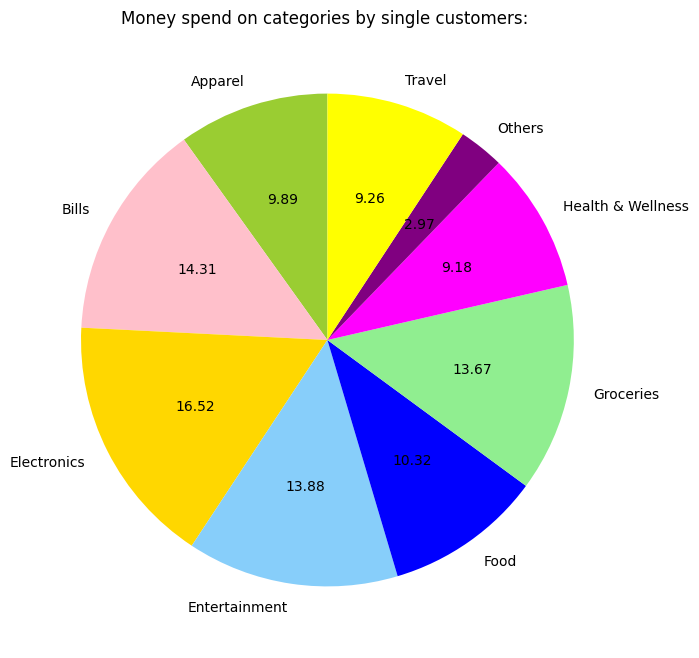

In [ ]:
single_cust = merged_df[merged_df['marital status'] == 'Single']
category_spend_single = single_cust.groupby('category')['spend'].sum()

colors= ['yellowgreen', 'pink', 'gold', 'lightskyblue', 'blue', 'lightgreen', 'magenta', 'purple', 'yellow']
plt.figure(figsize= (8,8))
plt.pie(category_spend_single, labels= category_spend_single.index, autopct= '%.2f', startangle= 90, colors= colors)
plt.title('Money spend on categories by single customers: ')
plt.show()

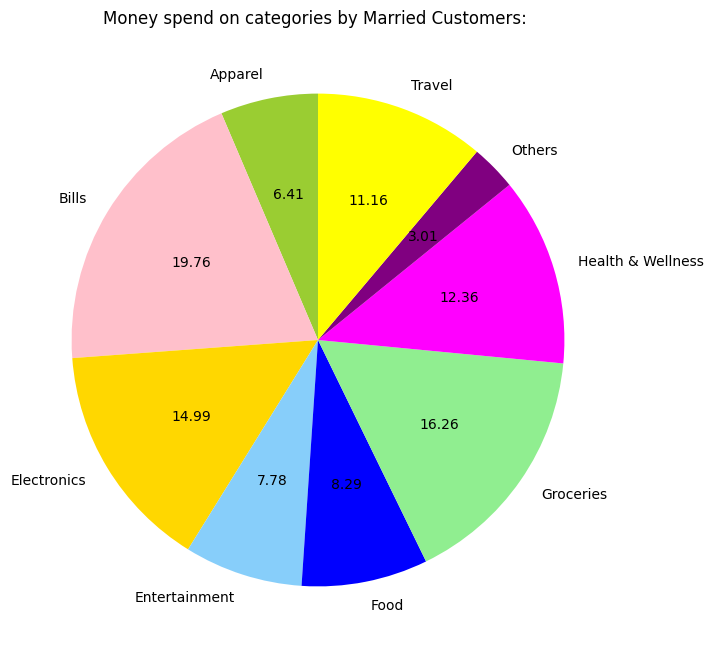

In [ ]:
married_cust= merged_df[merged_df['marital status'] == 'Married']
category_spend_married = merged_df.groupby('category')['spend'].sum()

colors= ['yellowgreen', 'pink', 'gold', 'lightskyblue', 'blue', 'lightgreen', 'magenta', 'purple', 'yellow']
plt.figure(figsize= (8,8))
plt.pie(category_spend_married, autopct= '%.2f', labels = category_spend_married.index, startangle= 90, colors= colors)
plt.title('Money spend on categories by Married Customers: ')
plt.show()

###* Married customers spend the most money on the category 'Bills', 'Groceries', 'Electronics', 'Health & Wellness' and so on.
###* Least spend on categories by married customers are 'Apparel' and 'Others.

###* Single customers spend mostly on categories 'Electronics', 'Bills', 'Entertainment', 'Groceries' and so on.
###* Least spend on categories by single customers are 'Health & Wellness' and 'Others'.

##Observations and Conclusion:

##Q1 - Which age group and profession uses credit card the most? What is the percentage usage of credit card by that age group?


##Observations -

*    By applying the groupby function, we know that the age group of 25 to 34 years uses credit card the most.
*   Infact, these people uses all the payment type more frequently than other age groups.
*   Percentage usage is 17.8 % month on month by credit card.
*   Salaried IT professionals has the highest transaction amount, a whopping INR 10,14,05,325.

##Causes -
*   IT companies have tie ups with credit card companies and private sector banks, which mandates the employees to open a new bank account with access to credit cards.
*   This is one of the main reason why young IT professionals possess credit cards, along with many perks such as e-commerce offers and airport lounge access.
*   IT professionals may need to attend workshops and conferences. As such credit cards offer cash back, travel points, etc., which they use it strategically to increase these rewards.





##Q2 What is the income utlization percentage of customers?

###Obervations -

*   The average income utlization percentage of many customers is 257.68 %.
*   The IT employees has 305.55 % and government employees has 173.77% income utilization %.
*   It can be good and bad news as well.

###Causes -

*   IT employees uses credit cards for travel as they get free access to airport lounge, cashback, among many perks. IT employees have to stay updated on technological advancements too. Whereas government employees don't have such requirements.
*   Your company can earn transaction fees and revenue on interests charged on outsanding balances. These will be additional source of income for the company.
*   However, over reliance on above sources may not be insustainable. Customers can default on their loans, that will increase operational cost and overload on the company.

##Q3 - What is the median salary for both the genders? Does that impact the money spend through credit cards?

###Observations -

*  The median salary is approximate INR 50,000 for the both the genders.
*  We found the columns 'avg_income' and 'spend' to have correlation coefficient of 0.24, which is conventionally weak.

###Causes -

*   These two columns have weak positive correlation, which indicates we directly cannot assume that income directly impacts amount spend.
*   We had only 4000 customer data, way less records to conclude any concrete closure.

##Q4 - What are the key customer segments ?

###Observations -

*   Category 'Bills' remains the most spend on category. Bills include house rent, electricity bills, wi-fi bills, water bills to name a few, all in all these are necessities.

*   In May alone, customers have spend INR 1,34,54,437 in bills. While in October, they spend INR 1,70,36,774.

*  Single customers have invested 16.52 % of the total amount spend on Electronics alone.

*  While married customers has spend 19.76 % of total amount on Bills.

*  Customers residing in Delhi NCR, Mumbai and Bangalore has the higher spending capacity.

*  The spending disparity between female and male is not huge. Both spend almost the same, with male customers spending a little higher through all payment type.

* Male customers spend more on 'Bills', 'Groceries', 'Electronics' and 'Travel', way higher than female customers spend on these categories. Female customers disburse high percent of income towards 'Health & Wellness', 'Bills' , 'Groceries' and 'Apparel'.

###Causes -

*  Single customers can afford to invest in electronics and entertainment, since they have higher disposable income compared to married customers. Customers who are single and tech-savvy priorities on staying up to date on technological news and gadgets.

*  With more people to provide for, married customers spend more to cover family oriented expenses. Married customers prefer to have their own home and children which explains why they spend most on bills and groceries.

* Tier A cities such as Delhi, Mumbai and Bangalore expensive to live it. The higher living cost( housing cost, maintenance expenses, fuel, groceries) play a key role in their spending patern.

*  With more female candidates coming to earn for themselves and family, they get access to credit cards and financial literacy contributing to comparable spending patterns.


##Suggestions -

* Young Professionals-


1.   Provide entertainment offers on social activities, dining and sports popular among the upcoming and newly employed customers.
2.   Engage them with education offers such as talk shows, career related courses and conferences, along with cash back and travel benefits on using your credit card.

*  Seniors and Middle aged customers -


1.   Tailor offers and discounts on health-related issues like wellness programs and clinical tests.
2.   Provide tools and ways to track and report their expenses on the go. Make sure to provide seamless user experience, keeping in mind their age and busy schedule.

*  Online shoppers -


1.   Offer the female customers with attractive brand deals and discounts on specific fashion stores. Always provide return or extend warranty on shopping online. Providing purchase protection will get you loyal customers.
2.   For the male customers, come up with travel insurances, crashing brand deals on electronics and tech-related publishes.

*  Family -


1.   Come up with good home , car and education loan offers for the married customers. Tailor reward system when they pay back on right time. Provide rewards on family oriented expenses such as groceries, entertainment and health & wellness.
2.   For the single customers, focus on getting offers and extended warranty on purchase of electronics and travel expenses.

*  City dwellers -


1.   Make a combination of offers and reward system on everyday purchases, groceries, apparels, paying interests through your credit cards.
2.   Introduce sign up and annual bonus to attract new customers.

* Business Owners -



1.   Offer them warranty and discounts on business-related expenses, telecommunication and supply expenses.
2.   Provide application features and tools for tracking and reporting business accounting.











